# Get Data

In [0]:
import os
from os import listdir
from os.path import isfile, join
import xml.etree.ElementTree as ET
import numpy as np
import nltk

In [0]:
!cp '/content/drive/My Drive/Colab Notebooks/NLP/Data (1)/Data.zip' 'Data.zip'

In [0]:
!unzip -qq Data.zip

In [0]:
path_train = '/content/Data/train/en'
path_test = '/content/Data/test/en'

In [0]:
files_train = [f for f in listdir(path_train) if isfile(join(path_train, f))]
files_test = [f for f in listdir(path_test) if isfile(join(path_test, f))]

In [7]:
for r in ET.parse(join(path_train,files_train[6])).getroot()[0]:
    print(r.text)

@Lin_Manuel We called it Butts Up in Alberta Canada.
@UnionSportsGuy @joerogan @rickyred09 They're shooting near the tigers to scare them off. Almost looks like sandbags at one point.
@_McDaniel16 Best 4th Quarter Ever.
@MaxStrunk @EASPORTSFIFA I don't think it's just you. I can't connect to Battlefield on PS4.
@BoLeviMitchell Yeeeeesssss. Scrappy white receiver? Perfect for the Pats. But will Bill take a WR in the 1st?
@ScottMitchellPM You should throw your name into the hat. It can't get worse can it?
@tomsegura On your tour dates you have Calgary spelt as 'Calgray'. Leads me to belive @ChristinaP is the personality champ.
@ScottMitchellPM Jesus, this is bad.
@nottjmiller @cashinginwithtj @CashLevy Shepard's Pie. Delicious Englishman's dish? Or a delicious dish of Englishman? #maskers
@nottjmiller @cashinginwithtj @CashLevy Shepard's Pie. Delicious Englishman's dish? Or a delicious dish of Englishman?
@dabnorfish @AesopRockWins That's like them blatantly trying to screw their custome

In [0]:
#ET.parse converts the file into the tree
def convert_texts(path_train, files_train):
    
    doc = []
    for i in range(len(files_train)):
        #Append the tweets to the corresponding document
        try:
            doc1 =[r.text for r in ET.parse(join(path_train,files_train[i])).getroot()[0]]
            doc.append(' '.join(t for t in doc1))
        except:
            print(files_train[i])
    return doc

In [9]:
# list of train and test tweets
t_train = convert_texts(path_train, files_train)
t_test  = convert_texts(path_test, files_test)

truth.txt
truth.txt


In [10]:
len(t_train)

3600

In [11]:
print(t_train[0])

@secrettourpro @OmegaDDC he had 9 previous wins in Torrey Pines but we saw what happened there!! @MolloyJoe one for the next GW podcast 😳😳 https://t.co/uHtO2fZCD5 @NoLayingUp @IndoSport looking forward to next Sunday already! @arielhelwani no reebok attire from Ronda either (Apart from weigh in gear) Surely Reebok won't be happy? Dominic Cruz is the man 😂👏 #UFC207  https://t.co/OxBw1jRqgD @arielhelwani check this out 😂🙌 #legend  https://t.co/ESuNGQkOKq The world we live in these days  https://t.co/7pUraXm1ZK .@McIlroyRory my mate @AzorAhai88  thinks I'm wasting my time! Prove him wrong 😎 #CantSpellForHisLife #BOSE https://t.co/VMlYFDadvc @CarlMullan all a bit coincidental don't you think? I reckon Perez or Hulkenberg could be in with a shout there! Alonso also 😎 @Sutzer94 I was close 😂 https://t.co/IQq8gjTGPH @todayfm Smooth Criminal #TrumpTune @ShannonPurcell might aswell highlight what everyone already's thinking! @secrettourpro everyone writing off the rookies. Bet it'll be one of t

# Get Labels 

In [0]:
def get_labels(path, files):
    dic={}
    task=[[],[]]
    for e in open(join(path,'truth.txt')).read().split('\n'):
        d=e.split(':::')
        if(len(d)==3):
            dic.update({d[0]: d[1:]})
            task[0].append(d[1])
            task[1].append(d[2])
    task=[sorted(list(set(t))) for t in task]
    
    d_task = [{item:i for i, item in enumerate(t)} for t in task]
    labels=[[],[]]

    for e in files:
        try:
            ID=e[:-4]
            labels[0].append(d_task[0][dic[ID][0]])
            labels[1].append(d_task[1][dic[ID][1]])
        except:
            pass
    print(d_task)
    return np.array(labels)


In [13]:
labels_train = get_labels(path_train, files_train)
labels_test  = get_labels(path_test , files_test)
labels_train.shape

[{'female': 0, 'male': 1}, {'australia': 0, 'canada': 1, 'great britain': 2, 'ireland': 3, 'new zealand': 4, 'united states': 5}]
[{'female': 0, 'male': 1}, {'australia': 0, 'canada': 1, 'great britain': 2, 'ireland': 3, 'new zealand': 4, 'united states': 5}]


(2, 3600)

In [14]:
labels_train[0]

array([1, 0, 0, ..., 0, 0, 0])

# Check distribution of data

<BarContainer object of 6 artists>

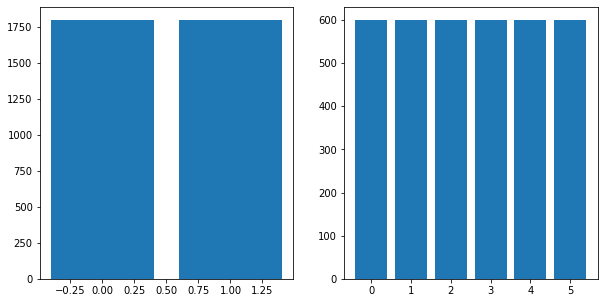

In [15]:
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))

gender_num= Counter(labels_train[0])

nation_num = Counter(labels_train[1])

ax[0].bar(gender_num.keys(),gender_num.values())

ax[1].bar(nation_num.keys(), nation_num.values())


# Preprocessing

In [0]:
import re

replacement_patterns = [
    #match url (i.e: https://t.co/5tF5G9VKtq)
    (r'\w+:\/{2}[\d\w-]+(\.[\d\w-]+)*(?:(?:\/[^\s/]*))*', '<url>'),

    #match user (i.e: @cerpintor )
    (r'@\w+', '<user>'),

    #match hashtag (i.e: #WomensMarchOnWashington)
    (r'#\w+', '<hashtag>'),

    #Replace "&..." with ''
    (r'&\w+', '')
]

class RegexReplacer(object):
    def __init__(self, patterns = replacement_patterns):
        self.patterns = [(re.compile(regrex),repl) for (regrex, repl) in
                        patterns]
    
    #Replace the words that match the patterns with replacement words
    def replace(self, text):
        s = text
        for (pattern, repl) in self.patterns:
            s = re.sub(pattern, repl, s)
        return s

In [17]:
import nltk
nltk.download('stopwords')
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

tknz = TweetTokenizer()
replacer = RegexReplacer()
stopwords = set(stopwords.words('english'))
punc = string.punctuation

def normalize(doc):
    
    for i in range(len(doc)):
        
        #Tokenize with replacement
        doc[i] = tknz.tokenize(replacer.replace(doc[i]))
        
        #Filter stopwords, punctuations, and lowercase
        doc[i] = [w.lower() for w in doc[i] if w not in punc and w not in stopwords]
    
        #Stem words
        
        lemmatizer = WordNetLemmatizer()
        
        doc[i] = [lemmatizer.lemmatize(w, pos='v') for w in doc[i]]
        
        
        #concat
        doc[i] = ' '.join(w for w in doc[i])
        
    return doc

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [18]:
nltk.download('wordnet')

t_train = normalize(t_train)
t_test =normalize(t_test)


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [19]:
print(len(t_train))
print(len(t_test))

3600
2400


# Model Training

In [0]:
import csv
import argparse
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_recall_fscore_support, roc_auc_score
from sklearn import metrics, preprocessing
import numpy as np

from sklearn import svm, datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

parameters = {'C': [.05, .12, .25, .5, 1, 2, 4]}

svr = svm.LinearSVC(class_weight='balanced')

## Bag of Words

In [0]:
#Find Frequency of Words

corpus_tweet = []

for doc in t_train:
    corpus_tweet += doc.split()

fdist = nltk.FreqDist(corpus_tweet)


In [22]:
len(fdist)

104400

In [0]:
#Sort the dist by decreasing order
def sortFreqDist(freqdict):
    
    freq = [(freqdict[key], key) for key in freqdict]
    return sorted(freq, reverse = True)

In [0]:
#Pick 5000 most frequent words
freq_tweets = sortFreqDist(fdist)
freq_tweets = freq_tweets[:5000]

In [0]:
#index of frequent tweets
dict_indices = dict()
index = 0
for i, word in enumerate(freq_tweets):
    dict_indices[word[1]] = i
    

In [0]:
#Split the frequency and the frequent words
freq, freq_words = zip(*freq_tweets)

In [0]:
#Build a bag of words

import numpy as np

def build_bow_tr(t_train, freq_words, dict_indices):
    
    BOW = np.zeros((len(t_train), len(freq_tweets)), dtype=int)
    
    #Loop through documents
    for index, tr in enumerate(t_train):
        fdist_doc = nltk.FreqDist(tr.split())
        
        #Loop through the words in each document
        for word in fdist_doc:
            #If word in document is also in most frequenty words,
            #append the frequency of that word in BOW
            if word in freq_words:
                BOW[index, dict_indices[word]] = fdist_doc[word]
        
    return BOW

In [0]:
#BOW for training set
BOW_tr = build_bow_tr(t_train, freq_words, dict_indices)

In [29]:
# 3600 doc with 5000 words
BOW_tr.shape

(3600, 5000)

In [0]:
#BOW for test set
BOW_val = build_bow_tr(t_test, freq_words, dict_indices )

In [31]:
BOW_val.shape

(2400, 5000)

In [0]:
import csv
import argparse
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, precision_recall_fscore_support, roc_auc_score
from sklearn import metrics, preprocessing
import numpy as np

from sklearn import svm, datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [33]:
parameters = {'C': [.05, .12, .25, .5, 1, 2, 4]}

svr = svm.LinearSVC(class_weight='balanced')
grid = GridSearchCV(estimator=svr, param_grid=parameters, n_jobs=8, scoring="f1_macro", cv=5)

grid.fit(BOW_tr,labels_train[0])

labels_pred = grid.predict(BOW_val)

p, r, f, _ = precision_recall_fscore_support(labels_test[0], labels_pred, average='macro', pos_label=None)

print(confusion_matrix(labels_test[0], labels_pred))
print(metrics.classification_report(labels_test[0], labels_pred))


[[945 255]
 [315 885]]
              precision    recall  f1-score   support

           0       0.75      0.79      0.77      1200
           1       0.78      0.74      0.76      1200

    accuracy                           0.76      2400
   macro avg       0.76      0.76      0.76      2400
weighted avg       0.76      0.76      0.76      2400



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [34]:
metrics.accuracy_score(labels_test[0], labels_pred)

0.7625

In [35]:
grid.fit(BOW_tr,labels_train[1])

labels_pred = grid.predict(BOW_val)

p, r, f, _ = precision_recall_fscore_support(labels_test[1], labels_pred, average='macro', pos_label=None)

print(confusion_matrix(labels_test[1], labels_pred))
print(metrics.classification_report(labels_test[1], labels_pred))


[[275  32  21  12  36  24]
 [ 19 301  12  15  16  37]
 [ 12  17 302  39  14  16]
 [ 16  12  30 313  13  16]
 [ 23   6  13   8 338  12]
 [ 15  46  10   9   8 312]]
              precision    recall  f1-score   support

           0       0.76      0.69      0.72       400
           1       0.73      0.75      0.74       400
           2       0.78      0.76      0.77       400
           3       0.79      0.78      0.79       400
           4       0.80      0.84      0.82       400
           5       0.75      0.78      0.76       400

    accuracy                           0.77      2400
   macro avg       0.77      0.77      0.77      2400
weighted avg       0.77      0.77      0.77      2400



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [36]:
metrics.accuracy_score(labels_test[1], labels_pred)

0.7670833333333333

## Tf-Idf


In [0]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer 

#tf-idf
tfidf_vectorizer=TfidfVectorizer(use_idf=True)

#just send in all your docs here
tfidf_vectorizer_train=tfidf_vectorizer.fit_transform(t_train)

tfidf_vectorizer_test=tfidf_vectorizer.transform(t_test)


In [38]:
tfidf_vectorizer_train.shape

(3600, 87879)

In [39]:
tfidf_vectorizer_test.shape

(2400, 87879)

In [40]:
grid = GridSearchCV(estimator=svr, param_grid=parameters, n_jobs=8, scoring="f1_macro", cv=5)
grid.fit(tfidf_vectorizer_train,labels_train[0])

labels_pred = grid.predict(tfidf_vectorizer_test)

print(confusion_matrix(labels_test[0], labels_pred))
print(metrics.classification_report(labels_test[0], labels_pred))


[[986 214]
 [268 932]]
              precision    recall  f1-score   support

           0       0.79      0.82      0.80      1200
           1       0.81      0.78      0.79      1200

    accuracy                           0.80      2400
   macro avg       0.80      0.80      0.80      2400
weighted avg       0.80      0.80      0.80      2400



In [41]:
print(metrics.f1_score(labels_test[0], labels_pred))


0.7945439045183291


In [42]:
grid = GridSearchCV(estimator=svr, param_grid=parameters, n_jobs=8, scoring="f1_macro", cv=5)
grid.fit(tfidf_vectorizer_train,labels_train[1])

labels_pred = grid.predict(tfidf_vectorizer_test)

print(confusion_matrix(labels_test[1], labels_pred))
print(metrics.classification_report(labels_test[1], labels_pred))

[[334  21  14  11  14   6]
 [ 11 342   9   5   6  27]
 [ 15  13 323  26   7  16]
 [  9   8  21 339   7  16]
 [ 13  12   7   1 359   8]
 [ 13  44   5   6   3 329]]
              precision    recall  f1-score   support

           0       0.85      0.83      0.84       400
           1       0.78      0.85      0.81       400
           2       0.85      0.81      0.83       400
           3       0.87      0.85      0.86       400
           4       0.91      0.90      0.90       400
           5       0.82      0.82      0.82       400

    accuracy                           0.84      2400
   macro avg       0.85      0.84      0.84      2400
weighted avg       0.85      0.84      0.84      2400



In [43]:
print(metrics.f1_score(labels_test[1], labels_pred, average='macro'))

0.8444450997871643


### Observe the top predictors for gender

In [44]:
words = tfidf_vectorizer.get_feature_names()

param = grid.best_params_
print(param)

{'C': 2}


In [45]:
model = svm.LinearSVC(C=0.5)
model.fit(tfidf_vectorizer_train,labels_train[0])

LinearSVC(C=0.5, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [46]:
words = tfidf_vectorizer.get_feature_names()

coef = model.coef_[0]
print(coef)

print(len(coef))

[ 0.44586367  0.46637921  0.01676967 ... -0.02122574 -0.02122574
 -0.02122574]
87879


In [0]:
relevant_words = [(words[idx], c) for idx, c in enumerate(coef)]
relevant_words.sort(key=lambda tup: abs(tup[1]), reverse=True)

In [48]:
relevant_words[:30]

[('women', -2.512904852694919),
 ('the', 1.9638031282716166),
 ('yes', -1.7596613586266112),
 ('love', -1.7552786243824663),
 ('mate', 1.7011036708768705),
 ('game', 1.6458028987965705),
 ('woman', -1.5926499092368385),
 ('oh', -1.5591666074240185),
 ('xx', -1.5572704320302426),
 ('cute', -1.527151662159127),
 ('cry', -1.4699367613336254),
 ('excite', -1.4569822372280354),
 ('sleep', -1.2884669991219664),
 ('lovely', -1.28212283050248),
 ('play', 1.260305873192125),
 ('really', -1.2546474153388603),
 ('miss', -1.2508388937517938),
 ('hair', -1.2376598371683898),
 ('heart', -1.2290614282587402),
 ('fab', -1.2110874239149425),
 ('bro', 1.1999665788270135),
 ('years', 1.1952705416235558),
 ('thank', -1.1944720380728233),
 ('so', -1.1942902810296825),
 ('baby', -1.1915125601177075),
 ('husband', -1.1892965015022152),
 ('good', 1.1846253317686846),
 ('okay', -1.1535624887257665),
 ('more', -1.1098106388140823),
 ('if', 1.1078160025548347)]

In [0]:
female = [w for w in relevant_words if w[1] < 0]
male= [w for w in relevant_words if w[1] >= 0]

In [50]:
female[:20]

[('women', -2.512904852694919),
 ('yes', -1.7596613586266112),
 ('love', -1.7552786243824663),
 ('woman', -1.5926499092368385),
 ('oh', -1.5591666074240185),
 ('xx', -1.5572704320302426),
 ('cute', -1.527151662159127),
 ('cry', -1.4699367613336254),
 ('excite', -1.4569822372280354),
 ('sleep', -1.2884669991219664),
 ('lovely', -1.28212283050248),
 ('really', -1.2546474153388603),
 ('miss', -1.2508388937517938),
 ('hair', -1.2376598371683898),
 ('heart', -1.2290614282587402),
 ('fab', -1.2110874239149425),
 ('thank', -1.1944720380728233),
 ('so', -1.1942902810296825),
 ('baby', -1.1915125601177075),
 ('husband', -1.1892965015022152)]

In [51]:
male[:30]

[('the', 1.9638031282716166),
 ('mate', 1.7011036708768705),
 ('game', 1.6458028987965705),
 ('play', 1.260305873192125),
 ('bro', 1.1999665788270135),
 ('years', 1.1952705416235558),
 ('good', 1.1846253317686846),
 ('if', 1.1078160025548347),
 ('man', 1.095239909006497),
 ('seem', 1.0780160622145363),
 ('fuck', 1.015029173029132),
 ('last', 0.9935142728212313),
 ('shit', 0.9840251878649682),
 ('gay', 0.9351377495079034),
 ('beer', 0.9145584938807096),
 ('team', 0.9091582072893521),
 ('apple', 0.8972397564901855),
 ('follow', 0.8875345656614726),
 ('gun', 0.8815135069994202),
 ('win', 0.8722037308425765),
 ('football', 0.8693533899534927),
 ('wife', 0.8526734479200061),
 ('album', 0.851458561135546),
 ('liberals', 0.8347453457052089),
 ('oppose', 0.8129879883371784),
 ('fine', 0.8090486845446687),
 ('beat', 0.7971616258515049),
 ('bet', 0.78403200033901),
 ('website', 0.7816891047315028),
 ('season', 0.774713278241528)]

## Word2Vec

In [0]:
import gensim
from gensim.models import KeyedVectors

In [53]:
from gensim.models import Word2Vec
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.test.utils import datapath, get_tmpfile

'''
path_glove = os.path.abspath('glove.twitter.27B/glove.twitter.27B.200d.txt')
path_w2v = os.path.abspath('glove.twitter.27B/glove.twitter.27B.200d_w2v.txt')

'''

"\npath_glove = os.path.abspath('glove.twitter.27B/glove.twitter.27B.200d.txt')\npath_w2v = os.path.abspath('glove.twitter.27B/glove.twitter.27B.200d_w2v.txt')\n\n"

In [0]:
"""
glove_file = datapath(path_glove)
tmp_file = get_tmpfile(path_w2v)

_ = glove2word2vec(glove_file, tmp_file)

"""
!cp '/content/drive/My Drive/Colab Notebooks/NLP/Data (1)/glove.twitter.27B.200d_w2v.txt' 'glove.twitter.27B.200d_w2v.txt'

In [55]:
path = os.path.abspath('/content/glove.twitter.27B.200d_w2v.txt')

model = KeyedVectors.load_word2vec_format(path, binary=False)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:410: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [56]:
model.most_similar(positive=['love'])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('you', 0.8460860252380371),
 ('much', 0.7890045642852783),
 ('always', 0.7601683735847473),
 ('know', 0.7598055005073547),
 ('my', 0.7519949078559875),
 ('and', 0.7513089776039124),
 ('loves', 0.7512385845184326),
 ('life', 0.7443933486938477),
 ('it', 0.7426838874816895),
 ("n't", 0.7408115267753601)]

In [57]:
model.most_similar(positive=['girl'])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('boy', 0.8434211015701294),
 ('girls', 0.8288908004760742),
 ('she', 0.803076446056366),
 ('guy', 0.787306010723114),
 ('woman', 0.7817050218582153),
 ('chick', 0.7750228643417358),
 ('friend', 0.7702170014381409),
 ('bitch', 0.7611054182052612),
 ('that', 0.7493616938591003),
 ('pretty', 0.7465850710868835)]

In [58]:
model.most_similar(positive=['boy'])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('girl', 0.8434211015701294),
 ('guy', 0.7662351131439209),
 ('kid', 0.7430557012557983),
 ('baby', 0.7402151823043823),
 ('dude', 0.7393355369567871),
 ('boys', 0.726765513420105),
 ('man', 0.7174534797668457),
 ('boi', 0.7088537216186523),
 ('nigga', 0.7040588855743408),
 ('brother', 0.7035762667655945)]

In [59]:
model.most_similar(positive=['man'])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('dude', 0.7253456711769104),
 ('boy', 0.7174534797668457),
 ('guy', 0.6998012065887451),
 ('shit', 0.6852256655693054),
 ('was', 0.6779443621635437),
 ("'s", 0.6762615442276001),
 ('bad', 0.6734011173248291),
 ('men', 0.6714874505996704),
 ('that', 0.6709873080253601),
 ('lol', 0.6646673083305359)]

In [60]:
model.most_similar(positive=['woman'])

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[('girl', 0.7817050218582153),
 ('women', 0.7705847024917603),
 ('guy', 0.7154314517974854),
 ('she', 0.7104362845420837),
 ('person', 0.7034647464752197),
 ('wife', 0.7029582858085632),
 ('female', 0.7000529766082764),
 ('mother', 0.6994998455047607),
 ('lady', 0.6945761442184448),
 ('who', 0.6705518960952759)]

In [0]:
#Build vector by taking the mean of the W2V vector of each word
def build_vector(t_train):
    
    w2v = []
    
    for doc in t_train:
                   
        mean = 0
        count = 0
        for word in doc.split():
            try:
                mean += model[word]
                count +=1
            except:
                pass
        w2v.append(mean/count)
                   
    return w2v
        
                
train_w2v =build_vector(t_train)
test_w2v = build_vector(t_test)

In [62]:
parameters = {'C': [.05, .12, .25, .5, 1, 2, 4]}

svr = svm.LinearSVC(class_weight='balanced')
grid = GridSearchCV(estimator=svr, param_grid=parameters, n_jobs=8, scoring="f1_macro", cv=5)

grid.fit(train_w2v,labels_train[0])

labels_pred = grid.predict(test_w2v)

p, r, f, _ = precision_recall_fscore_support(labels_test[0], labels_pred, average='macro', pos_label=None)

print(confusion_matrix(labels_test[0], labels_pred))
print(metrics.classification_report(labels_test[0], labels_pred))

[[978 222]
 [263 937]]
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1200
           1       0.81      0.78      0.79      1200

    accuracy                           0.80      2400
   macro avg       0.80      0.80      0.80      2400
weighted avg       0.80      0.80      0.80      2400



In [63]:
parameters = {'C': [.05, .12, .25, .5, 1, 2, 4]}

svr = svm.LinearSVC(class_weight='balanced')
grid = GridSearchCV(estimator=svr, param_grid=parameters, n_jobs=8, scoring="f1_macro", cv=5)

grid.fit(train_w2v,labels_train[1])

labels_pred = grid.predict(test_w2v)

p, r, f, _ = precision_recall_fscore_support(labels_test[1], labels_pred, average='macro', pos_label=None)

print(confusion_matrix(labels_test[1], labels_pred))
print(metrics.classification_report(labels_test[1], labels_pred))

[[235  33  12  32  67  21]
 [ 25 286   1  11  31  46]
 [ 25  15 247  64  34  15]
 [ 15  21  78 250  25  11]
 [ 40  25  22  19 281  13]
 [ 12  45   5   6  10 322]]
              precision    recall  f1-score   support

           0       0.67      0.59      0.62       400
           1       0.67      0.71      0.69       400
           2       0.68      0.62      0.65       400
           3       0.65      0.62      0.64       400
           4       0.63      0.70      0.66       400
           5       0.75      0.81      0.78       400

    accuracy                           0.68      2400
   macro avg       0.68      0.68      0.67      2400
weighted avg       0.68      0.68      0.67      2400



/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## Concatenate Word2Vec and Tf-Idf

In [0]:
from scipy.sparse import hstack

#Select k-best

#Concatenate tfidf and w2v vector
train_concat=hstack((tfidf_vectorizer_train, np.array(train_w2v)))
test_concat=hstack((tfidf_vectorizer_test, np.array(test_w2v)))


In [65]:
print(tfidf_vectorizer_train.shape)
print(np.array(train_w2v).shape)
print(train_concat.shape)
print(labels_train[0].shape)

(3600, 87879)
(3600, 200)
(3600, 88079)
(3600,)


In [66]:
parameters = {'C': [.05, .12, .25, .5, 1, 2, 4]}

svr = svm.LinearSVC(class_weight='balanced')
grid = GridSearchCV(estimator=svr, param_grid=parameters, n_jobs=1, scoring="f1_macro", cv=5)

grid.fit(train_concat,labels_train[0])

labels_pred = grid.predict(test_concat)

p, r, f, _ = precision_recall_fscore_support(labels_test[0], labels_pred, average='macro', pos_label=None)

print(confusion_matrix(labels_test[0], labels_pred))
print(metrics.classification_report(labels_test[0], labels_pred))
print(metrics.f1_score(labels_test[0], labels_pred))

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


[[979 221]
 [257 943]]
              precision    recall  f1-score   support

           0       0.79      0.82      0.80      1200
           1       0.81      0.79      0.80      1200

    accuracy                           0.80      2400
   macro avg       0.80      0.80      0.80      2400
weighted avg       0.80      0.80      0.80      2400

0.7978003384094755


# Visualize with Dimension Reduction (TSNE)

In [0]:
import math
from sklearn.model_selection import train_test_split

def compute_dor(TR, ndocs_out=0, y=None):    
    TR_subset_in = None
    if y is None:
        TR_subset_in, TR_subset_out = train_test_split(TR, test_size=ndocs_out, random_state=1)
    else :
        TR_subset_in, TR_subset_out = train_test_split(TR, stratify=y, test_size=ndocs_out, random_state=1)
    
    DTR = np.zeros((TR_subset_in.shape[1], TR_subset_in.shape[0]), dtype=np.float)
    print("DOR: Shape of the input matrix (BoT):", TR.shape)
    print("DOR: Shape of the term-feat matrix:", DTR.shape)

    tam_V = TR_subset_in.shape[1]
    for i, doc in enumerate(TR_subset_in):
        nonzero_positions = np.nonzero(doc)[0] # returns a tuple of n-dimensions. Since we have 1D array docs, it returns a tuple with one element. thus, we get the 0 index.
        tam_v = len(nonzero_positions) 
        for term in nonzero_positions:
            DTR[term, i] = (1 + math.log10(doc[term])) * math.log10(tam_V/tam_v)
    return DTR

In [0]:
from sklearn import preprocessing
DOR_base = compute_dor(tfidf_vectorizer_train.toarray(), 0.01)
DOR_base = preprocessing.normalize(DOR_base, norm='l2')

In [0]:
#Select best 1000 best features
from sklearn.feature_selection import SelectKBest, chi2
feats = SelectKBest(chi2, k=1000)
feats.fit(tfidf_vectorizer_train, labels_train[0])

best=feats.get_support(indices=True)
print('Reduce from {} features to {} features'.format(tfidf_vectorizer_train[1],best.shape[0]))

In [0]:
dict_indices = {}
for i, w in enumerate(tfidf_vectorizer.get_feature_names()):
  dict_indices[w] = i

In [0]:
#give the word provided the index
dict_indice_invert = {}
for w in dict_indices:
    dict_indice_invert[dict_indices[w]] = w

In [0]:
#Select the most important words
target_words = [dict_indice_invert[index] for index in best]

#Select important and most frequent words
words = [word for word in target_words if word in dict_indices]

#Find vector of these words
target_matrix = np.array([DOR_base[dict_indices[word]] for word in words])
target_matrix.shape

In [0]:
!cp '/content/drive/My Drive/Colab Notebooks/NLP/tsne_python/tsne.py' 'tsne.py'

In [0]:
#Reduce the dimension

from tsne import tsne

reduced_matrix = tsne(target_matrix, 2)

In [0]:
#Set the limit of the axes
max_x = np.amax(reduced_matrix, axis=0)[0]
max_y = np.amax(reduced_matrix, axis=0)[1]

In [0]:
reduced_matrix.shape

In [0]:
plt.figure(figsize=(40,40), dpi=100); plt.xlim((-max_x,max_x)); plt.ylim((-max_y,max_y))
plt.scatter(reduced_matrix[:, 0], reduced_matrix[:, 1], 20);
for i, word in enumerate(words):
    x = reduced_matrix[i, 0]
    y = reduced_matrix[i, 1]
    plt.annotate(word, (x,y))


# BERT


In [68]:
!pip install pytorch-transformers
!pip install pytorch-pretrained-bert
import torch
import torch.nn as nn
import torch.nn.functional as F
from pytorch_pretrained_bert.optimization import BertAdam, WarmupLinearSchedule

import pandas as pd

import unicodedata
from sklearn.model_selection import train_test_split
import pickle
import matplotlib.pyplot as plt

import numpy as np

from sklearn.svm import LinearSVC
from sklearn import svm, metrics
from sklearn.model_selection import train_test_split

import progressbar

import csv


import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

     |████████████████████████████████| 184kB 12.7MB/s 
     |████████████████████████████████| 870kB 29.4MB/s 
     |████████████████████████████████| 1.0MB 52.1MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.38-cp36-none-any.whl size=884628 sha256=56a83e2203770a480b99ebc06bb942f809c8bee8338c1a7cf2acce76e8b192a5
  Stored in directory: /root/.cache/pip/wheels/6d/ec/1a/21b8912e35e02741306f35f66c785f3afe94de754a0eaf1422
Successfully built sacremoses
     |████████████████████████████████| 133kB 13.9MB/s 


In [69]:
!pip install transformers
import transformers
from transformers import BertModel, BertTokenizerFast

     |████████████████████████████████| 552kB 23.9MB/s 
     |████████████████████████████████| 3.7MB 51.9MB/s 


In [0]:
from transformers import BertTokenizerFast, BertForMaskedLM


In [71]:
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased').cuda()

In [0]:
def get_bertinf(text):
  ttokens=[]
  for t in text:
    it = tokenizer.encode(t, add_special_tokens=True, max_length=50, pad_to_max_length=True)

    ttokens.append(it)

  return torch.tensor(ttokens),(torch.tensor(ttokens)>0).float()

In [0]:
def BERT_eval(ttokens, mask):

  return model(ttokens, attention_mask=mask)
  
  

In [0]:
def convert_texts_2(files_train, path_train):
  doc = []
  for i in range(len(files_train)):
      #Append the tweets to the corresponding document
      try:
          doc1 =[r.text for r in ET.parse(join(path_train,files_train[i])).getroot()[0]]
          doc.append(doc1)
      except:
          print(files_train[i])
  return doc

In [75]:
text_train = convert_texts_2(files_train, path_train)
text_test = convert_texts_2(files_test, path_test)

truth.txt
truth.txt


In [0]:
MAX = 50

def text_to_tensor(tweet_text):
  ttokens=[]
  masks=[]
  for i in range(len(tweet_text)):
    ttoken, mask = get_bertinf(tweet_text[i])
    ttokens.append(ttoken)
    masks.append(mask)

  return ttokens, masks

In [0]:
labels_train= torch.tensor(labels_train)

In [0]:
tokens_train, masks_train = text_to_tensor(text_train)
tokens_test, masks_test = text_to_tensor(text_test)

In [0]:
def tensor_to_vec(ttokens, masks):
  Vec = []
  for t, m in zip(ttokens, masks):
    t, m = t.cuda(), m.cuda()

    #1 is the presentation of the tweets
    y_pred = BERT_eval(t,m)[1]
    #Average of the tweets by features of one profile
    Vec.append(y_pred.cpu().detach().mean(0).unsqueeze(0))

  #Turn the list of arrays into an array
  #0 is the first axis to concatenate 
  return torch.cat(Vec, 0)


lb = labels_train.numpy()

In [0]:
X_train = tensor_to_vec(tokens_train, masks_train)
X_test = tensor_to_vec(tokens_test, masks_test)

In [81]:
print(X_train.shape)

torch.Size([3600, 768])


In [82]:
lb[0].shape

(3600,)

## SVM

In [83]:
clf = LinearSVC()
clf.fit(X_train, lb[0])

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [0]:
y_pred=clf.predict(X_test)

In [85]:
acc=metrics.accuracy_score(labels_test[0], y_pred)
f1=metrics.f1_score(labels_test[0], y_pred)

print("\n  \t Accuracy: %.4f\t F1: %.4f"%( acc, f1))


  	 Accuracy: 0.7817	 F1: 0.7904


In [0]:
acc=metrics.accuracy_score(labels_test[0], y_pred)
f1=metrics.f1_score(labels_test[0], y_pred)


# Neural Net

## Bert

In [0]:
import torch
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim

In [0]:
class Gender(nn.Module):
  def __init__(self):
    super(Gender, self).__init__()
    self.den1=nn.Linear(768, 500)
    self.den2=nn.Linear(500, 2)

  def forward(self, x):
    x = F.relu(self.den1(x))
    
    x = self.den2(x)

    #The sum of the output of 1 for the loss function
    return F.log_softmax(x, 1)

In [0]:
gender = Gender()

In [90]:
print(X_train.shape)
print(labels_train[0].shape)

torch.Size([3600, 768])
torch.Size([3600])


In [0]:
batch_size = 50
X_train = X_train.view(-1, batch_size, 768)
labels_train_gender = labels_train[0].view(-1, batch_size)

In [92]:
print(X_train.shape)
print(labels_train_gender.shape)

torch.Size([72, 50, 768])
torch.Size([72, 50])


In [93]:
gender(X_train[0])

tensor([[-0.6451, -0.7436],
        [-0.6384, -0.7511],
        [-0.6441, -0.7447],
        [-0.6392, -0.7502],
        [-0.6446, -0.7441],
        [-0.6442, -0.7447],
        [-0.6345, -0.7555],
        [-0.6363, -0.7535],
        [-0.6462, -0.7424],
        [-0.6376, -0.7520],
        [-0.6481, -0.7403],
        [-0.6490, -0.7394],
        [-0.6424, -0.7466],
        [-0.6364, -0.7533],
        [-0.6491, -0.7392],
        [-0.6454, -0.7433],
        [-0.6369, -0.7527],
        [-0.6515, -0.7366],
        [-0.6410, -0.7482],
        [-0.6390, -0.7504],
        [-0.6408, -0.7484],
        [-0.6373, -0.7523],
        [-0.6391, -0.7503],
        [-0.6405, -0.7488],
        [-0.6365, -0.7532],
        [-0.6506, -0.7375],
        [-0.6440, -0.7449],
        [-0.6295, -0.7611],
        [-0.6443, -0.7445],
        [-0.6413, -0.7478],
        [-0.6407, -0.7485],
        [-0.6451, -0.7436],
        [-0.6408, -0.7484],
        [-0.6512, -0.7369],
        [-0.6391, -0.7503],
        [-0.6428, -0

In [0]:
optimizer = optim.Adam(gender.parameters(), lr=1e-5)
criterio = nn.NLLLoss()

In [95]:
epochs = 100
LOSS = []
for e in range(epochs):

  for i, (x, y) in enumerate(zip(X_train, labels_train_gender)):
    y_pred = gender(x)
    loss = criterio(y_pred, y)
    #Calculate gradient of the loss 
    loss.backward()
    #Gradient descent
    optimizer.step()

    LOSS.append(loss.item())
    if i%10==0:
      print('Epoch: %d \t Batch: %d \t Loss: %.10f \t'%(e,i, torch.tensor(LOSS[-10:]).mean()))

Epoch: 0 	 Batch: 0 	 Loss: 0.6884672642 	
Epoch: 0 	 Batch: 10 	 Loss: 0.6927222013 	
Epoch: 0 	 Batch: 20 	 Loss: 0.6914150715 	
Epoch: 0 	 Batch: 30 	 Loss: 0.6872707009 	
Epoch: 0 	 Batch: 40 	 Loss: 0.6880311966 	
Epoch: 0 	 Batch: 50 	 Loss: 0.7030938864 	
Epoch: 0 	 Batch: 60 	 Loss: 0.7147867084 	
Epoch: 0 	 Batch: 70 	 Loss: 0.6824566126 	
Epoch: 1 	 Batch: 0 	 Loss: 0.6872223616 	
Epoch: 1 	 Batch: 10 	 Loss: 0.7062281370 	
Epoch: 1 	 Batch: 20 	 Loss: 0.7490071654 	
Epoch: 1 	 Batch: 30 	 Loss: 0.7268819213 	
Epoch: 1 	 Batch: 40 	 Loss: 0.7216072679 	
Epoch: 1 	 Batch: 50 	 Loss: 0.6875697970 	
Epoch: 1 	 Batch: 60 	 Loss: 0.7681688666 	
Epoch: 1 	 Batch: 70 	 Loss: 0.7835636735 	
Epoch: 2 	 Batch: 0 	 Loss: 0.8378089666 	
Epoch: 2 	 Batch: 10 	 Loss: 0.8669942021 	
Epoch: 2 	 Batch: 20 	 Loss: 0.8228966594 	
Epoch: 2 	 Batch: 30 	 Loss: 0.7604531646 	
Epoch: 2 	 Batch: 40 	 Loss: 0.6873018742 	
Epoch: 2 	 Batch: 50 	 Loss: 0.6927984953 	
Epoch: 2 	 Batch: 60 	 Loss: 0.7020

In [0]:
y_pred = gender(X_test)

In [97]:
print(y_pred.shape)

torch.Size([2400, 2])


In [98]:
print(y_pred)

tensor([[-0.7386, -0.6496],
        [-0.7305, -0.6571],
        [-0.7147, -0.6720],
        ...,
        [-0.7147, -0.6721],
        [-0.7386, -0.6496],
        [-0.7012, -0.6851]], grad_fn=<LogSoftmaxBackward>)


In [0]:
#Choose the class of maximum probability
y_pred = y_pred.argmax(1)

In [0]:
acc=metrics.accuracy_score(labels_test[0], y_pred)
f1=metrics.f1_score(labels_test[0], y_pred)


In [101]:
f1

0.595

## Tf-Idf

In [0]:
#tf-idf
tfidf_vectorizer=TfidfVectorizer(use_idf=True, max_features=1000)

#just send in all your docs here
tfidf_vectorizer_train=tfidf_vectorizer.fit_transform(t_train)

tfidf_vectorizer_test=tfidf_vectorizer.transform(t_test)

In [103]:
print(tfidf_vectorizer_train.shape)

(3600, 1000)


In [0]:
class Gender(nn.Module):
  def __init__(self):
    super(Gender, self).__init__()
    self.den1=nn.Linear(1000, 500)
    self.den2=nn.Linear(500, 2)

  def forward(self, x):
    x = F.relu(self.den1(x))
    
    x = self.den2(x)

    #The sum of the output of 1 for the loss function
    return F.log_softmax(x, 1)

In [0]:
#convert to numpy array then to tensor
X_train = torch.tensor(tfidf_vectorizer_train.toarray()).float()


In [106]:
gender = Gender().cuda()

batch_size = 50
X_train = X_train.view(-1, batch_size, 1000)
labels_train_gender = torch.tensor(labels_train[0]).view(-1, batch_size)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """


In [0]:
X_test = X_test.view(-1, batch_size, )

In [0]:
optimizer = optim.SGD(gender.parameters(), lr=1e-5)
criterio = nn.NLLLoss()

In [108]:
epochs = 200
LOSS = []
for e in range(epochs):

  for i, (x, y) in enumerate(zip(X_train, labels_train_gender)):
    x = x.cuda()
    y_pred = gender(x)
    y = y.cuda()
    loss = criterio(y_pred, y)
    #Calculate gradient of the loss 
    loss.backward()
    #Gradient descent
    optimizer.step()

    LOSS.append(loss.item())
    if i%10==0:
      print('Epoch: %d \t Batch: %d \t Loss: %.10f \t'%(e,i, torch.tensor(LOSS[-10:]).mean()))

Epoch: 0 	 Batch: 0 	 Loss: 0.6919872761 	
Epoch: 0 	 Batch: 10 	 Loss: 0.6929870844 	
Epoch: 0 	 Batch: 20 	 Loss: 0.6932057142 	
Epoch: 0 	 Batch: 30 	 Loss: 0.6930354238 	
Epoch: 0 	 Batch: 40 	 Loss: 0.6946591139 	
Epoch: 0 	 Batch: 50 	 Loss: 0.6934431791 	
Epoch: 0 	 Batch: 60 	 Loss: 0.6928786635 	
Epoch: 0 	 Batch: 70 	 Loss: 0.6939880252 	
Epoch: 1 	 Batch: 0 	 Loss: 0.6930136681 	
Epoch: 1 	 Batch: 10 	 Loss: 0.6929744482 	
Epoch: 1 	 Batch: 20 	 Loss: 0.6931899190 	
Epoch: 1 	 Batch: 30 	 Loss: 0.6930242181 	
Epoch: 1 	 Batch: 40 	 Loss: 0.6946060061 	
Epoch: 1 	 Batch: 50 	 Loss: 0.6934132576 	
Epoch: 1 	 Batch: 60 	 Loss: 0.6928614974 	
Epoch: 1 	 Batch: 70 	 Loss: 0.6939247251 	
Epoch: 2 	 Batch: 0 	 Loss: 0.6929915547 	
Epoch: 2 	 Batch: 10 	 Loss: 0.6929502487 	
Epoch: 2 	 Batch: 20 	 Loss: 0.6931577921 	
Epoch: 2 	 Batch: 30 	 Loss: 0.6930103302 	
Epoch: 2 	 Batch: 40 	 Loss: 0.6944727302 	
Epoch: 2 	 Batch: 50 	 Loss: 0.6933540702 	
Epoch: 2 	 Batch: 60 	 Loss: 0.6928

In [0]:
X_test = torch.tensor(tfidf_vectorizer_test.toarray()).float()


In [111]:
y_pred = gender(X_test.cuda())
print(y_pred.shape)

torch.Size([2400, 2])


In [0]:
y_pred = y_pred.argmax(1).detach().cpu().numpy()

In [113]:
print(metrics.f1_score(labels_test[0], y_pred))

0.7707193941943625
